In [ ]:
from google.colab import files
uploaded=files.upload()

Saving grades.csv to grades.csv


# increment 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classification report:
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       110
           D       0.00      0.00      0.00       123
           F       0.50      1.00      0.66       230

    accuracy                           0.50       463
   macro avg       0.17      0.33      0.22       463
weighted avg       0.25      0.50      0.33       463


SVM confusion matrix:
[[  0   0 110]
 [  0   0 123]
 [  0   0 230]]



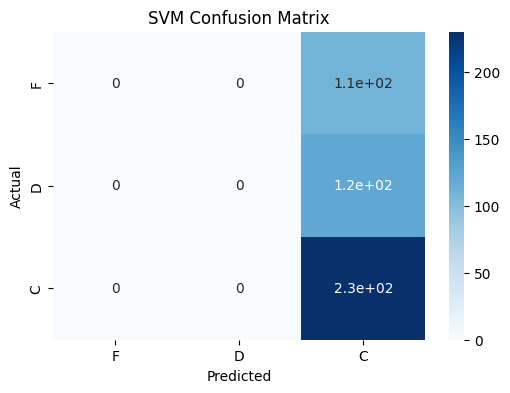

Random Forest classification report:
              precision    recall  f1-score   support

           C       0.50      0.03      0.05       110
           D       0.25      0.02      0.04       123
           F       0.50      0.97      0.66       230

    accuracy                           0.50       463
   macro avg       0.42      0.34      0.25       463
weighted avg       0.44      0.50      0.35       463


Random Forest confusion matrix:
[[  3   5 102]
 [  1   3 119]
 [  2   4 224]]



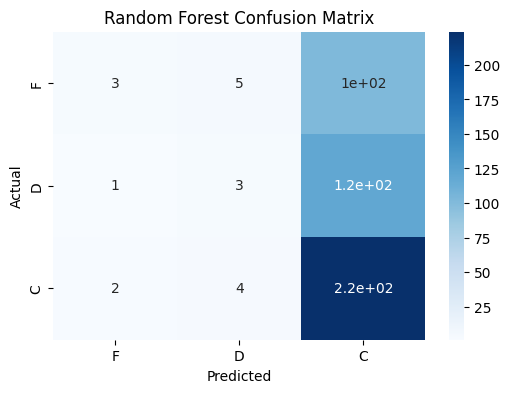

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes classification report:
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       110
           D       1.00      0.01      0.02       123
           F       0.50      1.00      0.66       230

    accuracy                           0.50       463
   macro avg       0.50      0.34      0.23       463
weighted avg       0.51      0.50      0.33       463


Naive Bayes confusion matrix:
[[  0   0 110]
 [  0   1 122]
 [  0   0 230]]



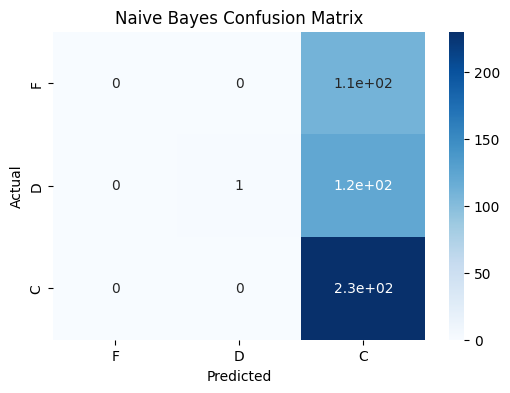

Decision Tree classification report:
              precision    recall  f1-score   support

           C       0.27      0.24      0.25       110
           D       0.23      0.20      0.21       123
           F       0.51      0.57      0.54       230

    accuracy                           0.39       463
   macro avg       0.33      0.33      0.33       463
weighted avg       0.37      0.39      0.38       463


Decision Tree confusion matrix:
[[ 26  31  53]
 [ 24  24  75]
 [ 48  51 131]]



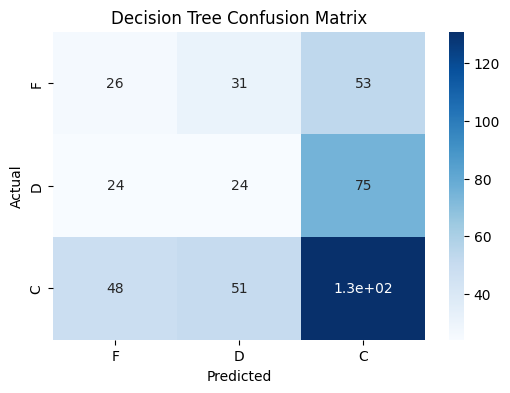

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot

# Load the data
data = pd.read_csv('grades.csv')
# Preprocessing
# Calculate the average grade across all assignments
data['average_grade'] = data[['assignment1_grade', 'assignment2_grade', 'assignment3_grade',
                              'assignment4_grade', 'assignment5_grade', 'assignment6_grade']].mean(axis=1)
# Bin the average grades into three categories
data['grade_category'] = pd.cut(data['average_grade'], bins=[0, 59, 69, 100], labels=['F', 'D', 'C'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['assignment1_submission', 'assignment2_submission', 
                                                          'assignment3_submission', 'assignment4_submission', 
                                                          'assignment5_submission', 'assignment6_submission']], 
                                                    data['grade_category'], test_size=0.2)

# Vectorize the submission dates using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Train and evaluate the models
models = {'SVM': SVC(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': MultinomialNB(), 'Decision Tree': DecisionTreeClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print the classification report and confusion matrix
    print(f'{name} classification report:\n{classification_report(y_test, y_pred)}\n')
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} confusion matrix:\n{cm}\n')
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['F', 'D', 'C'], yticklabels=['F', 'D', 'C'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# increment 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
import numpy as np

# Loading the dataset
data = pd.read_csv('grades.csv')
# Get the mean of each assignment
mean_assignment1 = data['assignment1_grade'].mean()
mean_assignment2 = data['assignment2_grade'].mean()
mean_assignment3 = data['assignment3_grade'].mean()
mean_assignment4 = data['assignment4_grade'].mean()
mean_assignment5 = data['assignment5_grade'].mean()
mean_assignment6 = data['assignment6_grade'].mean()

# Print the means
print("Assignment 1 Mean Grade:", mean_assignment1)
print("Assignment 2 Mean Grade:", mean_assignment2)
print("Assignment 3 Mean Grade:", mean_assignment3)
print("Assignment 4 Mean Grade:", mean_assignment4)
print("Assignment 5 Mean Grade:", mean_assignment5)
print("Assignment 6 Mean Grade:", mean_assignment6)
# Preprocessing
# Calculate the average grade across all assignments
data['average_grade'] = data[['assignment1_grade', 'assignment2_grade', 'assignment3_grade',
                              'assignment4_grade', 'assignment5_grade', 'assignment6_grade']].mean(axis=1)

# Bin the average grades into three categories
data['grade_category'] = pd.cut(data['average_grade'], bins=[0, 59, 69, 100], labels=['F', 'D', 'C'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['assignment1_submission', 'assignment2_submission',
                                                          'assignment3_submission', 'assignment4_submission',
                                                          'assignment5_submission', 'assignment6_submission']],
                                                    data['grade_category'], test_size=0.2)

# Vectorize the submission dates using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Train and evaluate the models
models = {'SVM': SVC(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': MultinomialNB(),
          'Decision Tree': DecisionTreeClassifier()}

for name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} cross-validation scores: {scores}')
    print(f'{name} average cross-validation score: {scores.mean()}')
    
    # Hyperparameter tuning
    if name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
        print(f'{name} best parameters: {grid_search.best_params_}')
        model = SVC(**grid_search.best_params_)
    
    if name == 'Random Forest':
        param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, None]}
        grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
        print(f'{name} best parameters: {grid_search.best_params_}')
        model = RandomForestClassifier(**grid_search.best_params_)
    
    if name == 'Decision Tree':
        param_grid = {'max_depth': [5, 10, 20, None]}
        grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)
        grid_search.fit(X_train, y_train)
        print(f'{name} best parameters: {grid_search.best_params_}')


Assignment 1 Mean Grade: 74.53573207477929
Assignment 2 Mean Grade: 66.84900712629484
Assignment 3 Mean Grade: 60.623197319241044
Assignment 4 Mean Grade: 54.11211193070327
Assignment 5 Mean Grade: 48.618522154413945
Assignment 6 Mean Grade: 43.84145185865406
SVM cross-validation scores: [0.48247978 0.48247978 0.48108108 0.48108108 0.48108108]
SVM average cross-validation score: 0.4816405623952794
Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Random Forest cross-validation scores: [0.47978437 0.47169811 0.47027027 0.47837838 0.44864865]
Random Forest average cross-validation score: 0.46975595541633275
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest best parameters: {'max_depth': 20, 'n_estimators': 200}
Naive Bayes cross-validation scores: [0.48247978 0.47978437 0.48108108 0.48108108 0.48108108]
Naive Bayes average cross-validation score: 0.4811014788373279
Decision Tree cross-va

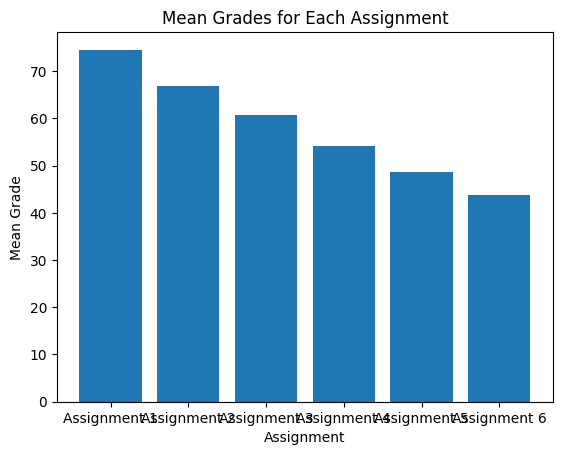

In [3]:
# Create a list of means
means = [mean_assignment1, mean_assignment2, mean_assignment3, mean_assignment4, mean_assignment5, mean_assignment6]

# Create a bar chart
plt.bar(['Assignment 1', 'Assignment 2', 'Assignment 3', 'Assignment 4', 'Assignment 5', 'Assignment 6'], means)
plt.title('Mean Grades for Each Assignment')
plt.xlabel('Assignment')
plt.ylabel('Mean Grade')
plt.show()


In [4]:
# further Training and evaluation of the the models using cross-validation
models = {'SVM': SVC(), 
          'Random Forest': RandomForestClassifier(), 
          'Naive Bayes': MultinomialNB(), 
          'Decision Tree': DecisionTreeClassifier()}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto']}

svm = SVC()
svm_grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [5]:
from sklearn.metrics import confusion_matrix
import itertools

# Ensemble models
svm = SVC(**svm_grid_search.best_params_)
rf = RandomForestClassifier(**rf_grid_search.best_params_)
nb = MultinomialNB()
dt = DecisionTreeClassifier()

# Create the voting and stacking classifiers
voting_clf = VotingClassifier([('svm', svm), ('rf', rf), ('nb', nb), ('dt', dt)], voting='hard')
stacking_clf = StackingClassifier([('svm', svm), ('rf', rf), ('nb', nb), ('dt', dt)],
                                  final_estimator=RandomForestClassifier(), cv=5)

# Train the ensemble models
voting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Evaluate the ensemble models
print(f'Voting Classifier accuracy: {voting_clf.score(X_test, y_test):.2f}')
print(f'Stacking Classifier accuracy: {stacking_clf.score(X_test, y_test):.2f}')

# Generate the confusion matrices for the ensemble models
y_pred = voting_clf.predict(X_test)
cm_voting = confusion_matrix(y_test, y_pred)
print('Voting Classifier Confusion Matrix:')
print(cm_voting)

y_pred = stacking_clf.predict(X_test)
cm_stacking = confusion_matrix(y_test, y_pred)
print('Stacking Classifier Confusion Matrix:')
print(cm_stacking)




Voting Classifier accuracy: 0.50
Stacking Classifier accuracy: 0.46
Voting Classifier Confusion Matrix:
[[ 12   9  72]
 [ 12  12 101]
 [ 21  15 209]]
Stacking Classifier Confusion Matrix:
[[  9  14  70]
 [  4  25  96]
 [ 21  44 180]]


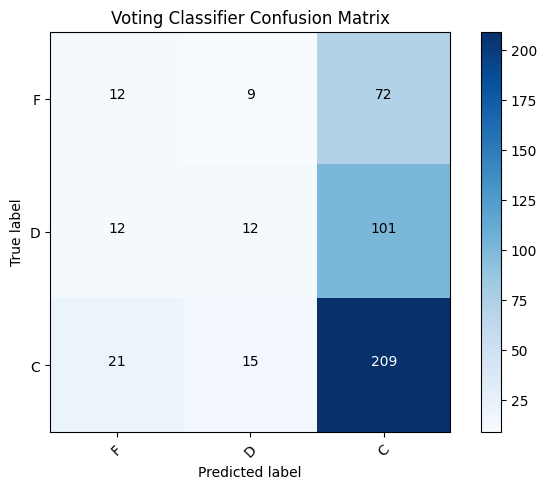

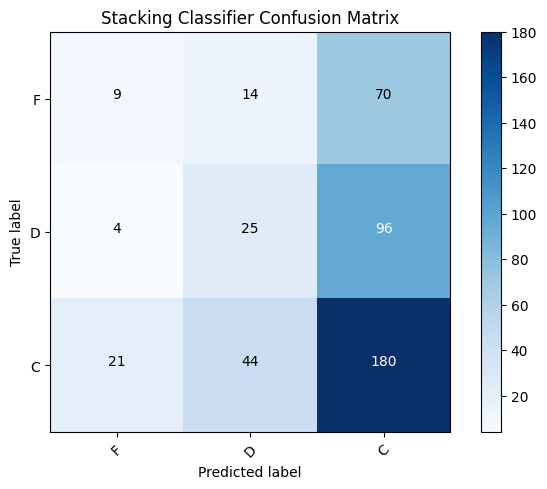

In [6]:
# Visualize the confusion matrices
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm_voting, ['F', 'D', 'C'], title='Voting Classifier Confusion Matrix')
plt.show()
plot_confusion_matrix(cm_stacking, ['F', 'D', 'C'], title='Stacking Classifier Confusion Matrix')
plt.show()

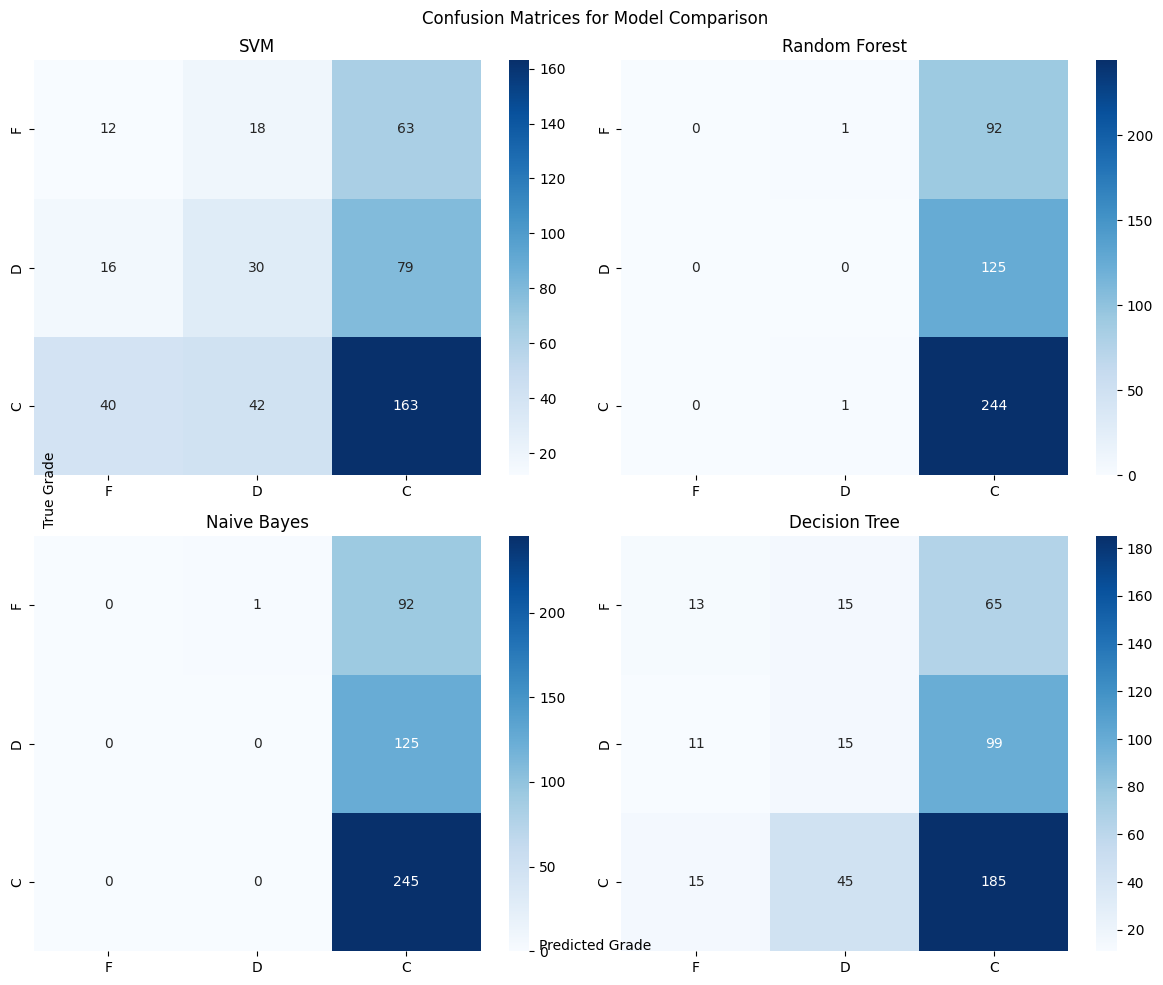

In [7]:
# Graph model
# Train and evaluate the models
models = {'SVM': SVC(C=10, gamma=1, kernel='rbf'),
          'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20),
          'Naive Bayes': MultinomialNB(),
          'Decision Tree': DecisionTreeClassifier(max_depth=20)}

confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Create a figure with subplots for each confusion matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, matrix) in enumerate(confusion_matrices.items()):
    # Create heatmap
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['F', 'D', 'C'], yticklabels=['F', 'D', 'C'], ax=axes[i])
    axes[i].set_title(name)

# Set overall figure title and axis labels
fig.suptitle('Confusion Matrices for Model Comparison')
fig.text(0.5, 0.04, 'Predicted Grade', ha='center')
fig.text(0.04, 0.5, 'True Grade', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           C       0.00      0.00      0.00        93
           D       0.00      0.00      0.00       125
           F       0.53      0.99      0.69       245

    accuracy                           0.52       463
   macro avg       0.18      0.33      0.23       463
weighted avg       0.28      0.52      0.36       463



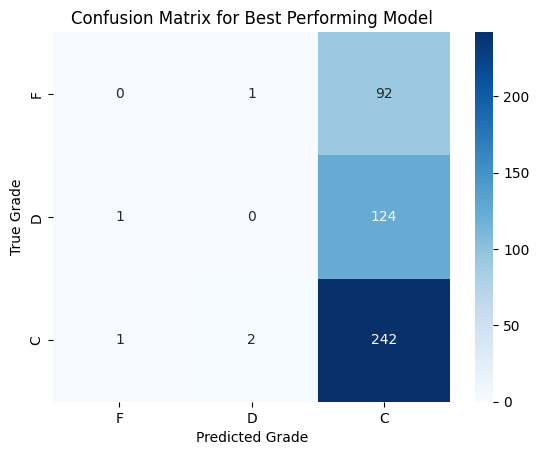

In [8]:
# Train and evaluate the best performing model
best_model = RandomForestClassifier(n_estimators=100, max_depth=20)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['F', 'D', 'C'], yticklabels=['F', 'D', 'C'])
plt.title('Confusion Matrix for Best Performing Model')
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.show()
